## Model training

## import data and libraries

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix,RocCurveDisplay
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


In [30]:
df=pd.read_csv('data/clean_hr_data.csv')
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,...,3,4,1,6,3,3,2,2,2,2


## preparing x and y variable

In [31]:
x=df.drop(columns=["Attrition"],axis=1)
y = df["Attrition"].map({"No": 0, "Yes": 1})


In [32]:
x.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,Sales Executive,...,3,1,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,Research Scientist,...,4,4,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,Laboratory Technician,...,3,2,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,Research Scientist,...,3,3,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,Laboratory Technician,...,3,4,1,6,3,3,2,2,2,2


In [33]:
x.shape

(1470, 26)

In [34]:



numeric_features = [
    'Age', 'DistanceFromHome', 'NumCompaniesWorked', 'PercentSalaryHike',
    'StockOptionLevel', 'TrainingTimesLastYear', 'YearsAtCompany',
    'YearsSinceLastPromotion', 'YearsWithCurrManager', 'MonthlyIncome',
    'TotalWorkingYears', 'YearsInCurrentRole'
]

label_encoding_features = [
    'Education', 'EnvironmentSatisfaction', 'JobInvolvement',
    'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction',
    'WorkLifeBalance'
]

onehot_encoding_features = [
    'BusinessTravel', 'Department', 'EducationField', 'Gender',
    'JobRole', 'MaritalStatus', 'OverTime'
]

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()
label_transformer=OrdinalEncoder()

preprocessor = ColumnTransformer(
   [
       ("StandardScaler",numeric_transformer,numeric_features),
       ("OneHotEncoder",oh_transformer,onehot_encoding_features),
       ("OrdinalEncoder",label_transformer,label_encoding_features)
   ]
)


In [35]:
x=preprocessor.fit_transform(x)

In [36]:
x.shape

(1470, 47)

In [37]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [38]:
y.shape

(1470,)

In [39]:


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape    



((1176, 47), (1176,), (294, 47), (294,))

## as our dataset is imbalanced we have to use smote beacuse it has more no values than yes

In [40]:


smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts().to_dict())
print("After SMOTE:", y_train_res.value_counts().to_dict())


Before SMOTE: {0: 978, 1: 198}
After SMOTE: {0: 978, 1: 978}


In [41]:

def evaluate_classification(y_true, y_pred, y_proba=None):
    results = {
        "accuracy": accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred),
        "recall": recall_score(y_true, y_pred),
        "f1": f1_score(y_true, y_pred),
        "confusion_matrix": confusion_matrix(y_true, y_pred)
    }
    
    if y_proba is not None: 
        results["roc_auc"] = roc_auc_score(y_true, y_proba)
    
    return results


In [42]:

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "CatBoost": CatBoostClassifier(verbose=0),
    "K-Neighbors": KNeighborsClassifier(),
    "SVM": SVC(probability=True), 
    "Naive Bayes": GaussianNB()
}

model_list = []
roc_list = []

for name, model in models.items():
   
    model.fit(X_train_res, y_train_res)


    y_pred = model.predict(X_test)

    y_proba = None
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]

  
    results = evaluate_classification(y_test, y_pred, y_proba)

    model_list.append(name)
    roc_list.append(results.get("roc_auc", None))

    print(name)
    print("Test set performance:")
    print(f"- Accuracy: {results['accuracy']:.4f}")
    print(f"- Precision: {results['precision']:.4f}")
    print(f"- Recall: {results['recall']:.4f}")
    print(f"- F1 Score: {results['f1']:.4f}")
    if "roc_auc" in results:
        print(f"- ROC-AUC: {results['roc_auc']:.4f}")
    print(f"- Confusion Matrix:\n{results['confusion_matrix']}")
    print("="*40 + "\n")


Logistic Regression
Test set performance:
- Accuracy: 0.7687
- Precision: 0.2958
- Recall: 0.5385
- F1 Score: 0.3818
- ROC-AUC: 0.7643
- Confusion Matrix:
[[205  50]
 [ 18  21]]

Random Forest
Test set performance:
- Accuracy: 0.8707
- Precision: 0.5333
- Recall: 0.2051
- F1 Score: 0.2963
- ROC-AUC: 0.7180
- Confusion Matrix:
[[248   7]
 [ 31   8]]

AdaBoost
Test set performance:
- Accuracy: 0.8503
- Precision: 0.4510
- Recall: 0.5897
- F1 Score: 0.5111
- ROC-AUC: 0.7911
- Confusion Matrix:
[[227  28]
 [ 16  23]]

XGBoost
Test set performance:
- Accuracy: 0.8844
- Precision: 0.5862
- Recall: 0.4359
- F1 Score: 0.5000
- ROC-AUC: 0.8032
- Confusion Matrix:
[[243  12]
 [ 22  17]]

CatBoost
Test set performance:
- Accuracy: 0.8878
- Precision: 0.6500
- Recall: 0.3333
- F1 Score: 0.4407
- ROC-AUC: 0.7878
- Confusion Matrix:
[[248   7]
 [ 26  13]]

K-Neighbors
Test set performance:
- Accuracy: 0.6429
- Precision: 0.2155
- Recall: 0.6410
- F1 Score: 0.3226
- ROC-AUC: 0.6801
- Confusion Matrix

## Model Comparison and Best Choice

We tested multiple classification models to predict **employee attrition**. Below is the performance summary:

- **Logistic Regression**: Balanced ROC-AUC (0.76) but low precision, many false positives.  
- **Random Forest**: Very high accuracy (0.87) but poor recall (0.20), meaning it misses many attrition cases.  
- **AdaBoost**: Good trade-off between precision (0.45) and recall (0.59), with a decent ROC-AUC (0.79).  
- **XGBoost**: Best ROC-AUC (0.80) and balanced performance (Precision 0.58, Recall 0.43).  
- **CatBoost**: High accuracy (0.88), decent precision (0.65), but recall is low (0.33).  
- **KNN**: High recall (0.64) but very low accuracy (0.64) and poor precision.  
- **SVM**: Balanced model (Precision 0.40, Recall 0.51, ROC-AUC 0.74), but not better than boosting models.  
- **Naive Bayes**: Weak overall performance, low accuracy and precision.

### Decision Criteria:
- Since this is an **employee attrition problem**, **recall** (ability to identify employees who are likely to leave) is very important. Missing these employees means the company cannot take preventive actions.  
- At the same time, **precision** also matters, because flagging too many false positives wastes resources.  
- **ROC-AUC** is used as the overall robustness measure.

### Best Model:
- **XGBoost** offers the **best balance** across metrics with the highest ROC-AUC (0.8032), good accuracy (0.88), and reasonable recall (0.43).  
- **AdaBoost** is a close contender with slightly lower ROC-AUC but higher recall (0.59).  
- If **catching as many attrition cases as possible** is the top priority, **AdaBoost** may be chosen.  
- If we want a **balanced and stable model**, **XGBoost** is the preferred choice.  

===Model i am going to use is **XGBoost** (with recall tuning if business wants more sensitivity).


##XGBoost

In [43]:

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_model.fit(X_train_res, y_train_res)

y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_proba)

print(f"XGBoost Accuracy: {acc:.4f}")
print(f"XGBoost ROC-AUC: {roc:.4f}")



XGBoost Accuracy: 0.8844
XGBoost ROC-AUC: 0.8032


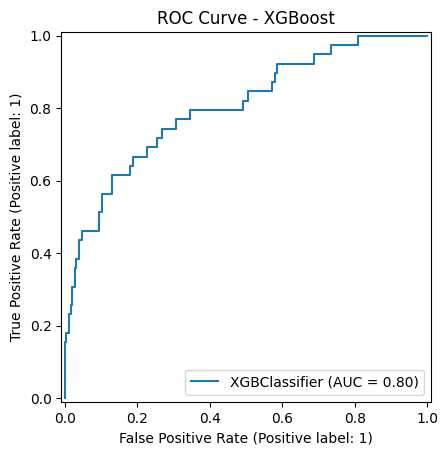

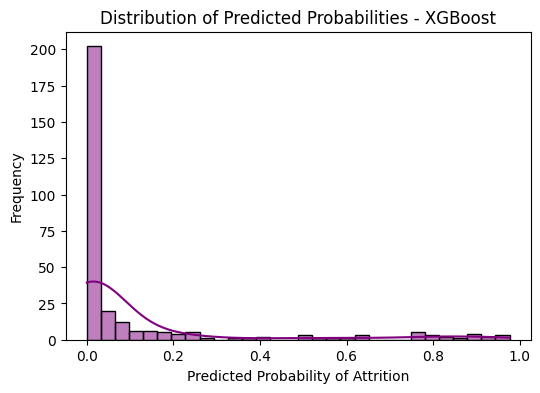

In [44]:

RocCurveDisplay.from_estimator(xgb_model, X_test, y_test)
plt.title("ROC Curve - XGBoost")
plt.show()


y_proba = xgb_model.predict_proba(X_test)[:, 1] 
plt.figure(figsize=(6,4))
sns.histplot(y_proba, bins=30, kde=True, color="purple")
plt.title("Distribution of Predicted Probabilities - XGBoost")
plt.xlabel("Predicted Probability of Attrition")
plt.ylabel("Frequency")
plt.show()

In [45]:
results_df = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred,
    "Predicted_Prob": y_proba
})
print(results_df.head(15))

    Actual  Predicted  Predicted_Prob
0        0          0        0.003500
1        0          0        0.002486
2        1          0        0.063267
3        0          0        0.000551
4        0          0        0.003164
5        0          1        0.644169
6        0          0        0.020170
7        0          0        0.000394
8        0          0        0.041260
9        0          0        0.017039
10       0          0        0.012334
11       0          0        0.016755
12       0          0        0.016086
13       0          0        0.019988
14       0          0        0.000414


The model is good at general classification and separating classes, but its recall is low, meaning it struggles to detect actual attrition cases. With hyperparameter tuning and threshold adjustments, recall and overall performance can be significantly improved.

After finishing model training with hyper parameter tuning we found that AdaBoost Classifier is best with ROC_AUC: 0.8155 and Recall: 0.5128